In [67]:
import matplotlib.pyplot as plt
import lhapdf
import numpy as np
import json
import math
import pylab
import sys

In [87]:
set_cteq6 = lhapdf.getPDFSet("cteq6l1")
#set_cteq6 = lhapdf.getPDFSet("JAM20-SIDIS_FF_pion_nlo")
#set_cteq6 = lhapdf.getPDFSet("JAM20-SIDIS_FF_proton_nlo")

p_cteq6 = set_cteq6.mkPDFs()

LHAPDF 6.4.0 loading all 1 PDFs in set cteq6l1
cteq6l1, version 4; 1 PDF members


/home/hdbhatt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


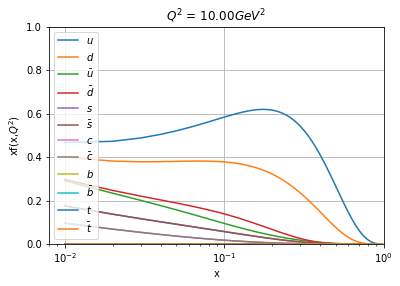

In [96]:
# Q2=[4,4.75,5,5.75,6.09,5.0]
#Q2=[4.0,3.898,4.75,4.764,5.5, 4.5]
Q2=[4.0,3.898,4.75,4.764,10, 4.5]
Q=math.sqrt(Q2[4])
x_axis = np.arange(0.01,0.99,0.01)
#x_axis = np.arange(0.3,0.35,0.01)
ux=[]
ubarx=[]
dx=[]
dbarx=[]
sx=[]
sbarx=[]
cx=[]
cbarx=[]
bx=[]
bbarx=[]
tx=[]
tbarx=[]
gx=[]
sumratio=[]
dratio=[]

for x in np.arange(0.01,0.99,0.01):
#for x in np.arange(0.3,0.35,0.01):
    ux.append(p_cteq6[0].xfxQ(2,x,Q))
    dx.append(p_cteq6[0].xfxQ(1,x,Q))
    ubarx.append(p_cteq6[0].xfxQ(-2,x,Q))
    dbarx.append(p_cteq6[0].xfxQ(-1,x,Q))
    sx.append(p_cteq6[0].xfxQ(3,x,Q))
    sbarx.append(p_cteq6[0].xfxQ(-3,x,Q))
    cx.append(p_cteq6[0].xfxQ(4,x,Q))
    cbarx.append(p_cteq6[0].xfxQ(-4,x,Q))
    bx.append(p_cteq6[0].xfxQ(5,x,Q))
    bbarx.append(p_cteq6[0].xfxQ(-5,x,Q))
    tx.append(p_cteq6[0].xfxQ(6,x,Q))
    tbarx.append(p_cteq6[0].xfxQ(-6,x,Q))
    gx.append(p_cteq6[0].xfxQ(21,x,Q))

fig = plt.figure()  
ax=fig.add_subplot()
ax.set_xscale('log')
plt.plot(x_axis,ux,label=r"$u$")
plt.plot(x_axis,dx,label=r"$d$")
plt.plot(x_axis,ubarx,label=r"$\bar u$")
plt.plot(x_axis,dbarx,label=r"$\bar d$")
plt.plot(x_axis,sx,label=r"$s$")
plt.plot(x_axis,sbarx,label=r"$\bar s$")
plt.plot(x_axis,cx,label=r"$c$")
plt.plot(x_axis,cbarx,label=r"$\bar c$")
plt.plot(x_axis,bx,label=r"$b$")
plt.plot(x_axis,bbarx,label=r"$\bar b$")
plt.plot(x_axis,tx,label=r"$t$")
plt.plot(x_axis,tbarx,label=r"$\bar t$")
#plt.plot(x_axis,gx,label=r"$gluon$")
plt.axis([0, 1, 0, 1])

plt.xlabel("x")
#plt.ylabel(0,1)
plt.ylabel(r"xf(x,$Q^2$)")
Q2_str =str(Q*Q)
plt.title(r"$Q^2$ = "+Q2_str[0:5] +"$GeV^2$")
plt.legend()
plt.grid()
pylab.show()




[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98]
[0.97551521 0.96596848 0.95971185 0.95471773 0.95010901 0.94549067
 0.94065858 0.9354994  0.9301581  0.92456141 0.91878509 0.91288133
 0.90689938 0.90095911 0.89503763 0.88920894 0.88343855 0.87777735
 0.87225665 0.86686273 0.86161333 0.85650497 0.85155169 0.84674287
 0.84206248 0.83750707 0.83309325 0.82879592 0.82463438 0.82054521
 0.81658745 0.81270025 0.80890828 0.80519904 0.8015642  0.7979874
 0.79446487 0.79102994 0.78760451 0.78423329 0.78089658 0.77759081
 0.7743147  0.771075   0.76781911 0

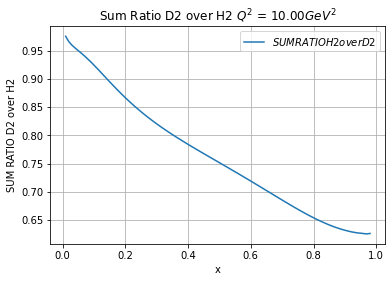

In [97]:
u=np.asarray(ux)
d=np.asarray(dx)
ubar=np.asarray(ubarx)
dbar=np.asarray(dbarx)
#sumratio=(4*u+4*ubar+d+dbar)/(5*(u+d+ubar+dbar))
sumratio=(5*(u+d+ubar+dbar))/(4*u+4*ubar+d+dbar)/2.0#2 for per nucleon
dratio = (3*(u-ubar+d-dbar))/(4*(u-ubar)-(d-dbar))/2.0
x_axis= np.arange(0.01, 0.99, 0.01)
#x_axis1= np.arange(0.34, 0.35, 0.01)
#plt.plot(x_axis1,diffratio,label = "$SUM RATIO H2 over D2$")
#print(x_axis1, sumratio)
print(x_axis)
print(sumratio)
plt.plot(x_axis,sumratio,label = "$SUM RATIO H2 over D2$")
plt.xlabel("x")#or "x"
#font = {'family':'serif','size':206, 'serif': ['computer modern roman']}
plt.ylabel("SUM RATIO D2 over H2")
plt.title("Sum Ratio D2 over H2 $Q^2$ = "+Q2_str[0:5] +"$GeV^2$")
plt.grid()
plt.legend()
#print(x_axis1, sumratio)
#file_path = 'randomfile.txt'
#sys.stdout = open(file_path, "w")
#print(x_axis1, sumratio)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98]
[0.69656629 0.6834178  0.67379904 0.66603157 0.65946862 0.65378438
 0.64876004 0.64423431 0.64016329 0.63641503 0.63293839 0.62968073
 0.62659849 0.62369245 0.62090786 0.61823691 0.61562924 0.61306439
 0.61057342 0.60810197 0.60564782 0.6032017  0.60076457 0.59830396
 0.59583883 0.59335339 0.59083728 0.58828343 0.58569024 0.58305933
 0.58037438 0.57765055 0.57486675 0.57203441 0.56914096 0.56619375
 0.56318291 0.56012194 0.55699634 0.55381016 0.5505634  0.54725407
 0.54389238 0.54047721 0.53698639 

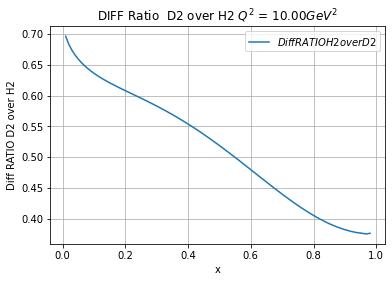

In [98]:
u=np.asarray(ux)
d=np.asarray(dx)
ubar=np.asarray(ubarx)
dbar=np.asarray(dbarx)
plt.plot(x_axis,dratio,label = "$Diff RATIO H2 over D2$")
#print(x_axis1,dratio)
print(x_axis)
print(dratio)

plt.xlabel("x")#or "x"
plt.ylabel("Diff RATIO D2 over H2")
plt.title("DIFF Ratio  D2 over H2 $Q^2$ = "+Q2_str[0:5] +"$GeV^2$")
plt.grid()
plt.legend()

# 